Compare the mean body temperature on menstrual days (all days during flow) to non-menstrual days.


In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import json
from scipy.stats import ttest_ind

# Paths to your XML and JSON data files
menstrual_flow_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your XML file path
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"  # Replace with your JSON file path

# Load and parse the menstrual flow XML data
tree = ET.parse(menstrual_flow_path)
root = tree.getroot()

# Extract menstrual flow start dates
menstrual_flow_dates = []
for record in root.findall("Record"):
    if record.get("type") == "HKCategoryTypeIdentifierMenstrualFlow":
        for metadata in record.findall("MetadataEntry"):
            if metadata.get("key") == "HKMenstrualCycleStart" and metadata.get("value") == "1":
                start_date = record.get("startDate").split(" ")[0]  # Only the date part
                menstrual_flow_dates.append(start_date)

# Convert to DataFrame
menstrual_flow_df = pd.DataFrame({"start_date": pd.to_datetime(menstrual_flow_dates)})

# Load the temperature JSON data
with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])

# Identify menstrual and non-menstrual days
temperature_df["is_menstrual"] = temperature_df["date"].dt.date.isin(menstrual_flow_df["start_date"].dt.date)

# Group data into menstrual and non-menstrual
menstrual_temps = temperature_df[temperature_df["is_menstrual"]]["temperature"]
non_menstrual_temps = temperature_df[~temperature_df["is_menstrual"]]["temperature"]

# Perform t-test
t_stat, p_value = ttest_ind(menstrual_temps, non_menstrual_temps, equal_var=False)

# Display results
# Print the null hypothesis
print("Null Hypothesis: The body temperature does not rise during menstrual flow.")

# Perform t-test
t_stat, p_value = ttest_ind(menstrual_temps, non_menstrual_temps, equal_var=False)

# Display results
# Print the null and alternative hypotheses
print("Null Hypothesis: The body temperature does not rise during menstrual flow.")
print("Alternative Hypothesis: The body temperature significantly rises during menstrual flow.")

# Perform t-test
t_stat, p_value = ttest_ind(menstrual_temps, non_menstrual_temps, equal_var=False)

# Display results
print("Average Temperature During Menstrual Flow:", menstrual_temps.mean())
print("Average Temperature on Non-Menstrual Days:", non_menstrual_temps.mean())
print("T-Test Results: t-statistic =", t_stat, ", p-value =", p_value)

# Interpretation
if p_value < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in temperature.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in temperature.")

Null Hypothesis: The body temperature does not rise during menstrual flow.
Null Hypothesis: The body temperature does not rise during menstrual flow.
Alternative Hypothesis: The body temperature significantly rises during menstrual flow.
Average Temperature During Menstrual Flow: 37.07777777777778
Average Temperature on Non-Menstrual Days: 36.70441767068274
T-Test Results: t-statistic = 4.9112993402820795 , p-value = 0.0004699406514043625
Result: Reject the null hypothesis. There is a significant difference in temperature.


Test in order to find a correlation within the daytime and body temperature


In [2]:
import json
import pandas as pd

# Path to your JSON temperature data
temperature_data_path =  "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json" # Replace with your JSON file path

# Load the temperature JSON data
with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])

# Define time periods
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Noon"
    else:
        return "Night"

# Add a time-of-day column
temperature_df["time_of_day"] = temperature_df["date"].dt.hour.apply(categorize_time_of_day)

# Calculate the average temperature for each time period
avg_temperatures = temperature_df.groupby("time_of_day")["temperature"].mean()

# Identify the period with the highest temperature
highest_period = avg_temperatures.idxmax()
highest_temp = avg_temperatures.max()

# Print results
print("Average Temperature by Time of Day:")
print(avg_temperatures)
print(f"The time of day with the highest average temperature is '{highest_period}' with an average temperature of {highest_temp:.2f}°C.")

# Print your hypothesis
print("Hypothesis: Body temperature rises until the end of the day (highest at night).")

# Compare the results with your hypothesis
if highest_period == "Night":
    print("Result: The hypothesis is supported. The highest temperature occurs at night.")
else:
    print(f"Result: The hypothesis is not supported. The highest temperature occurs during '{highest_period}'.")

Average Temperature by Time of Day:
time_of_day
Morning    36.722093
Night      36.711628
Noon       36.718605
Name: temperature, dtype: float64
The time of day with the highest average temperature is 'Morning' with an average temperature of 36.72°C.
Hypothesis: Body temperature rises until the end of the day (highest at night).
Result: The hypothesis is not supported. The highest temperature occurs during 'Morning'.


In [3]:
from scipy.stats import f_oneway

# Group temperatures by time period
morning_temps = temperature_df[temperature_df["time_of_day"] == "Morning"]["temperature"]
noon_temps = temperature_df[temperature_df["time_of_day"] == "Noon"]["temperature"]
night_temps = temperature_df[temperature_df["time_of_day"] == "Night"]["temperature"]

# Perform ANOVA test
f_stat, p_value_anova = f_oneway(morning_temps, noon_temps, night_temps)

# Print results
print("ANOVA Test Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value_anova)

# Interpretation
if p_value_anova < 0.05:
    print("Result: There is a significant difference in temperatures across time periods.")
else:
    print("Result: No significant difference in temperatures across time periods.")

ANOVA Test Results:
F-statistic: 0.011641683967956163
p-value: 0.9884263435366618
Result: No significant difference in temperatures across time periods.


In [4]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
h_stat, p_value_kruskal = kruskal(morning_temps, noon_temps, night_temps)

# Print results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", h_stat)
print("p-value:", p_value_kruskal)

# Interpretation
if p_value_kruskal < 0.05:
    print("Result: There is a significant difference in temperatures across time periods.")
else:
    print("Result: No significant difference in temperatures across time periods.")

Kruskal-Wallis Test Results:
H-statistic: 0.03510007545679484
p-value: 0.982603067209545
Result: No significant difference in temperatures across time periods.


In [5]:
from scipy.stats import pearsonr, spearmanr

# Map time periods to numeric values
time_mapping = {"Morning": 0, "Noon": 1, "Night": 2}
temperature_df["time_numeric"] = temperature_df["time_of_day"].map(time_mapping)

# Perform Pearson correlation
pearson_corr, p_value_pearson = pearsonr(temperature_df["time_numeric"], temperature_df["temperature"])

# Perform Spearman correlation (non-parametric)
spearman_corr, p_value_spearman = spearmanr(temperature_df["time_numeric"], temperature_df["temperature"])

# Print results
print("Correlation Analysis Results:")
print("Pearson Correlation Coefficient:", pearson_corr, ", p-value:", p_value_pearson)
print("Spearman Correlation Coefficient:", spearman_corr, ", p-value:", p_value_spearman)

# Interpretation
if p_value_pearson < 0.05:
    print("Result: Pearson correlation suggests a significant relationship between time of day and temperature.")
else:
    print("Result: Pearson correlation does not suggest a significant relationship.")

if p_value_spearman < 0.05:
    print("Result: Spearman correlation suggests a significant relationship between time of day and temperature.")
else:
    print("Result: Spearman correlation does not suggest a significant relationship.")

Correlation Analysis Results:
Pearson Correlation Coefficient: -0.009382873269676191 , p-value: 0.8807782334350173
Spearman Correlation Coefficient: -0.010673252315220774 , p-value: 0.8645302692538684
Result: Pearson correlation does not suggest a significant relationship.
Result: Spearman correlation does not suggest a significant relationship.


<Figure size 1000x600 with 0 Axes>

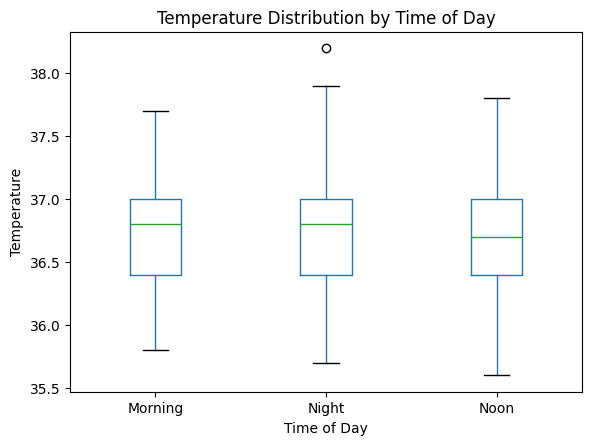

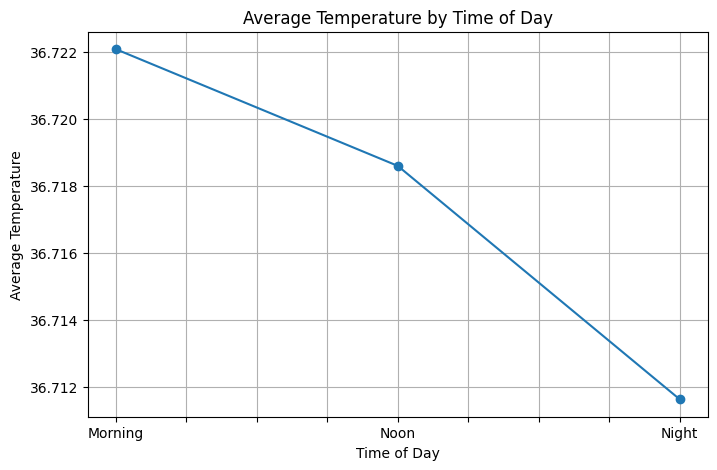

In [6]:
import matplotlib.pyplot as plt

# Boxplot for temperatures by time of day
plt.figure(figsize=(10, 6))
temperature_df.boxplot(column="temperature", by="time_of_day")
plt.title("Temperature Distribution by Time of Day")
plt.suptitle("")  # Remove default title
plt.xlabel("Time of Day")
plt.ylabel("Temperature")
plt.grid(False)
plt.show()

# Line plot for average temperature across time periods
avg_temp_by_time = temperature_df.groupby("time_of_day")["temperature"].mean()
avg_temp_by_time = avg_temp_by_time.loc[["Morning", "Noon", "Night"]]  # Order the periods

plt.figure(figsize=(8, 5))
avg_temp_by_time.plot(kind="line", marker="o")
plt.title("Average Temperature by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Temperature")
plt.grid(True)
plt.show()

In [13]:
import pandas as pd
import json

# Paths to your data files
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"   # Replace with your JSON file path

# Menstrual cycle start dates and durations
menstrual_cycles = {
    "2024-09-27": 5,  # Start date and duration
    "2024-10-28": 4,
    "2024-11-23": 7
}

# Load the temperature JSON data
with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])  # Ensure datetime format

# Define the function to calculate cycle day (Day 1 starts on menstrual flow start date)
def get_cycle_day(date):
    date = pd.to_datetime(date).date()  # Ensure it's a date object
    for start_date, duration in menstrual_cycles.items():
        start_date = pd.to_datetime(start_date).date()  # Ensure start_date is also a date object
        if start_date <= date <= start_date + pd.Timedelta(days=duration - 1):
            return (date - start_date).days + 1  # Return the cycle day (1-based index)
    return None  # Return None if not part of a menstrual cycle

# Identify the menstrual cycle day for each temperature reading
temperature_df["cycle_day"] = temperature_df["date"].apply(get_cycle_day)

# Filter only the days within menstrual cycles
menstrual_temp_df = temperature_df.dropna(subset=["cycle_day"])

# Calculate average temperature for all cycle days
overall_avg_temp = menstrual_temp_df["temperature"].mean()

# Find days where the temperature is above the overall average
above_avg_days = menstrual_temp_df[menstrual_temp_df["temperature"] > overall_avg_temp]

# Group by cycle day and calculate average temperature per day
average_temps_by_day = menstrual_temp_df.groupby("cycle_day")["temperature"].mean()

# Find the specific cycle days where the temperature rises above the overall average
cycle_days_above_avg = average_temps_by_day[average_temps_by_day > overall_avg_temp]

# Determine which days (by cycle day) consistently show higher-than-average temperatures across all cycles
consistent_high_days = []
for day in cycle_days_above_avg.index:
    high_in_all_cycles = all(
        menstrual_temp_df[
            (menstrual_temp_df["cycle_day"] == day)
        ]["temperature"].mean() > overall_avg_temp
        for _, duration in menstrual_cycles.items()
    )
    if high_in_all_cycles:
        consistent_high_days.append(day)

# Print Results
print(f"Overall Average Temperature during Menstrual Cycles: {overall_avg_temp:.2f}°C")
print("\nDays where body temperature is above the overall average:")
print(above_avg_days)

print("\nCycle days where the average temperature is higher than the overall average:")
print(cycle_days_above_avg)

print("\nDays across all cycles where body temperature consistently rises above the overall average:")
print(consistent_high_days)


Overall Average Temperature during Menstrual Cycles: 36.91°C

Days where body temperature is above the overall average:
                   date  temperature  cycle_day
3   2024-09-27 10:55:00         37.2        1.0
4   2024-09-27 15:09:00         37.4        1.0
5   2024-09-27 21:52:00         37.2        1.0
15  2024-10-01 08:08:00         37.0        5.0
17  2024-10-01 21:05:00         37.1        5.0
96  2024-10-28 08:52:00         37.3        1.0
99  2024-10-29 09:48:00         37.4        2.0
101 2024-10-29 23:23:00         37.0        2.0
176 2024-11-23 22:21:00         37.1        1.0
177 2024-11-24 09:52:00         37.0        2.0
178 2024-11-24 15:19:00         37.5        2.0
179 2024-11-24 23:31:00         37.6        2.0
180 2024-11-25 11:02:00         37.5        3.0
181 2024-11-25 16:20:00         37.0        3.0
183 2024-11-26 10:38:00         37.0        4.0
184 2024-11-26 14:42:00         37.4        4.0
185 2024-11-26 20:09:00         37.0        4.0
186 2024-11-27 1

Perform hypothesis testing for only the first two days of the menstural cycle 



In [15]:
import pandas as pd
import json
from scipy.stats import ttest_ind

# Paths to your data files
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"  # Replace
# Paths to your data files
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"  

# Menstrual cycle start dates and durations
menstrual_cycles = {
    "2024-09-27": 5,  # Start date and duration
    "2024-10-28": 4,
    "2024-11-23": 7
}

# Load the temperature JSON data
with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])

# Define the function to calculate cycle day
def get_cycle_day(date):
    date = pd.to_datetime(date).date()  # Ensure it's a date object
    for start_date, duration in menstrual_cycles.items():
        start_date = pd.to_datetime(start_date).date()  # Ensure start_date is also a date object
        if start_date <= date <= start_date + pd.Timedelta(days=duration - 1):
            return (date - start_date).days + 1  # Return the cycle day (1-based index)
    return None  # Return None if not part of a menstrual cycle

# Assign cycle days to the temperature data
temperature_df["cycle_day"] = temperature_df["date"].apply(get_cycle_day)

# Filter data for Day 1 and Day 2 of the menstrual cycle
days_1_and_2_temps = temperature_df[temperature_df["cycle_day"].isin([1, 2])]["temperature"]

# Filter non-menstrual days
non_menstrual_temps = temperature_df[temperature_df["cycle_day"].isna()]["temperature"]

# Perform t-test between Day 1 & 2 temperatures and non-menstrual days
t_stat, p_value = ttest_ind(days_1_and_2_temps, non_menstrual_temps, equal_var=False)

# Display results
print(" Alternative Hypothesis: Body temperature rises during the first days of the menstrual cycle.")
print("\nDay 1 and Day 2 Average Temperature:", days_1_and_2_temps.mean())
print("Non-Menstrual Days Average Temperature:", non_menstrual_temps.mean())
print("T-Test Results: t-statistic =", t_stat, ", p-value =", p_value)

# Interpretation
if p_value < 0.05:
    print("Result: Reject the null hypothesis. Body temperature significantly rises during Day 1 and Day 2.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in body temperature.")


 Alternative Hypothesis: Body temperature rises during the first days of the menstrual cycle.

Day 1 and Day 2 Average Temperature: 37.083333333333336
Non-Menstrual Days Average Temperature: 36.672380952380955
T-Test Results: t-statistic = 5.745598789946167 , p-value = 4.298963007136907e-06
Result: Reject the null hypothesis. Body temperature significantly rises during Day 1 and Day 2.


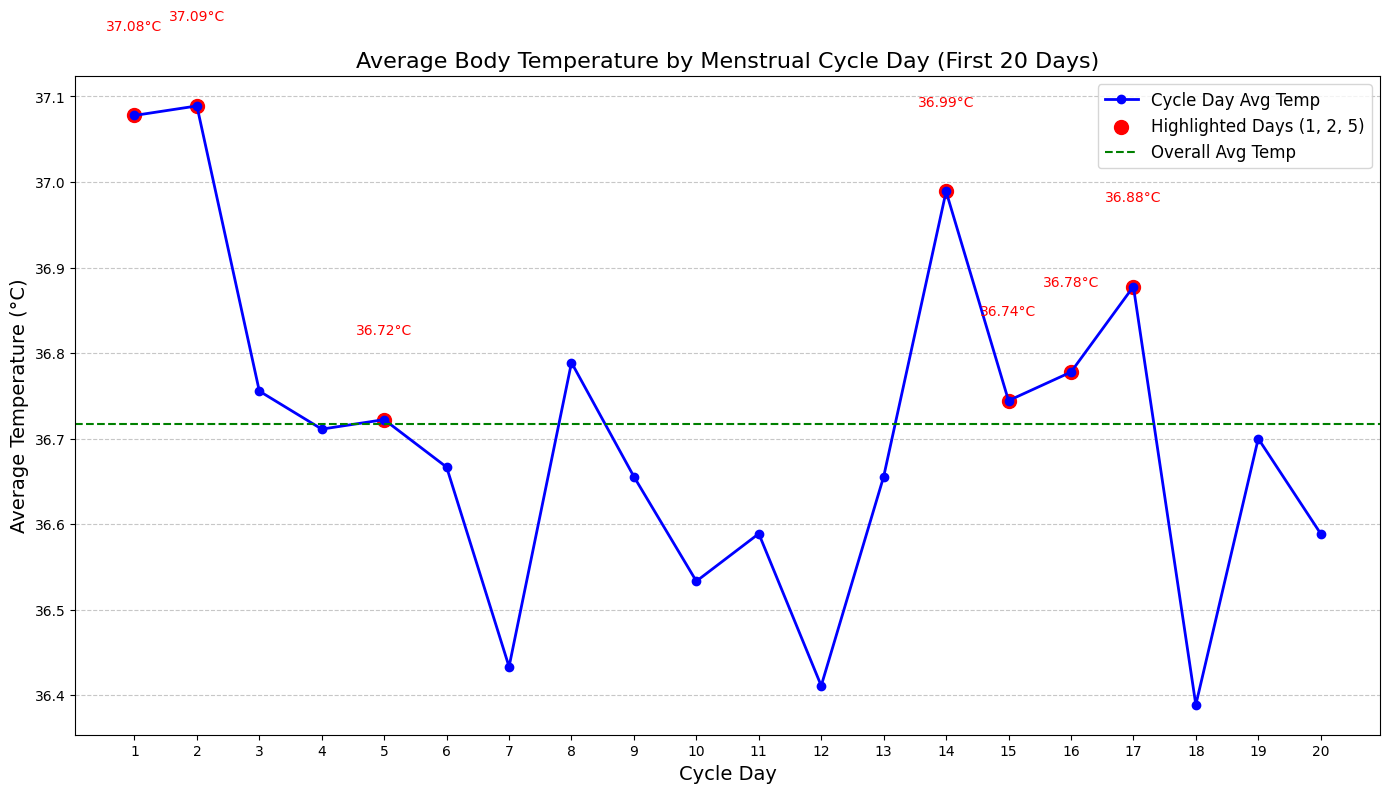

In [20]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load the temperature JSON data
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"  # Replace with your JSON file path

with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])

# Menstrual cycle start dates and durations
menstrual_cycles = {
    "2024-09-27": 25,  # Start date and cycle duration (adjust as needed)
    "2024-10-28": 25,
    "2024-11-23": 25,
}

# Define a function to calculate cycle day
def get_cycle_day(date):
    date = pd.to_datetime(date).date()
    for start_date, duration in menstrual_cycles.items():
        start_date = pd.to_datetime(start_date).date()
        if start_date <= date <= start_date + pd.Timedelta(days=duration - 1):
            return (date - start_date).days + 1  # Return cycle day (1-based index)
    return None

# Assign cycle days to the temperature data
temperature_df["cycle_day"] = temperature_df["date"].apply(get_cycle_day)

# Filter data for the first 20 cycle days
first_20_days_df = temperature_df[temperature_df["cycle_day"] <= 20]

# Calculate average temperature for each cycle day
average_temps_first_20_days = (
    first_20_days_df.groupby("cycle_day")["temperature"].mean().dropna()
)

# Highlight specific days (e.g., Days 1, 2, and 5)
highlight_days = [1, 2, 5,14,15,16,17]

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(
    average_temps_first_20_days.index,
    average_temps_first_20_days.values,
    marker="o",
    label="Cycle Day Avg Temp",
    linewidth=2,
    color="blue",
)
plt.scatter(
    highlight_days,
    [average_temps_first_20_days.loc[day] for day in highlight_days],
    color="red",
    s=100,
    label="Highlighted Days (1, 2, 5)",
)

# Add annotations for highlighted days
for day in highlight_days:
    plt.text(
        day,
        average_temps_first_20_days.loc[day] + 0.1,
        f"{average_temps_first_20_days.loc[day]:.2f}°C",
        color="red",
        ha="center",
        fontsize=10,
    )

# Add a horizontal line for the overall average temperature
overall_avg_temp = temperature_df["temperature"].mean()
plt.axhline(
    y=overall_avg_temp,
    color="green",
    linestyle="--",
    linewidth=1.5,
    label="Overall Avg Temp",
)

# Customize plot
plt.title("Average Body Temperature by Menstrual Cycle Day (First 20 Days)", fontsize=16)
plt.xlabel("Cycle Day", fontsize=14)
plt.ylabel("Average Temperature (°C)", fontsize=14)
plt.xticks(range(1, 21))  # Show days 1 to 20
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


TEST FOR OTHER DAYS OF THE CYCLE 


In [24]:
from scipy.stats import ttest_1samp
import pandas as pd
import json

# Load the temperature JSON data
temperature_data_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"  # Replace with your JSON file path

with open(temperature_data_path, "r") as file:
    temperature_data = json.load(file)

# Convert JSON data to DataFrame
temperature_df = pd.DataFrame(temperature_data)
temperature_df["date"] = pd.to_datetime(temperature_df["date"])

# Menstrual cycle start dates and durations
menstrual_cycles = {
    "2024-09-27": 25,
    "2024-10-28": 25,
    "2024-11-23": 25,
}

# Define a function to calculate cycle day
def get_cycle_day(date):
    date = pd.to_datetime(date).date()
    for start_date, duration in menstrual_cycles.items():
        start_date = pd.to_datetime(start_date).date()
        if start_date <= date <= start_date + pd.Timedelta(days=duration - 1):
            return (date - start_date).days + 1  # Return cycle day (1-based index)
    return None

# Assign cycle days to the temperature data
temperature_df["cycle_day"] = temperature_df["date"].apply(get_cycle_day)

# Calculate overall average temperature
overall_avg_temp = temperature_df["temperature"].mean()

# Days to test
test_days = [14, 15, 16, 17]

# Perform hypothesis tests for each of the days
print("Hypothesis Testing for Cycle Days 14, 15, 16, and 17:")
for day in test_days:
    # Filter temperatures for the current day
    day_temps = temperature_df[temperature_df["cycle_day"] == day]["temperature"]

    if not day_temps.empty:
        # Perform a one-sample t-test against the overall average
        t_stat, p_value = ttest_1samp(day_temps, overall_avg_temp)

        # Display the results
        print(f"\nDay {day}:")
        print(f"  - Mean Temperature: {day_temps.mean():.2f}°C")
        print(f"  - Overall Avg Temperature: {overall_avg_temp:.2f}°C")
        print(f"  - t-statistic: {t_stat:.2f}")
        print(f"  - p-value: {p_value:.4f}")
        print(f"  - Significant Difference: {'Yes' if p_value < 0.05 else 'No'}")
    else:
        print(f"\nDay {day}: No data available for this day.")


Hypothesis Testing for Cycle Days 14, 15, 16, and 17:

Day 14:
  - Mean Temperature: 36.99°C
  - Overall Avg Temperature: 36.72°C
  - t-statistic: 2.53
  - p-value: 0.0353
  - Significant Difference: Yes

Day 15:
  - Mean Temperature: 36.74°C
  - Overall Avg Temperature: 36.72°C
  - t-statistic: 0.22
  - p-value: 0.8280
  - Significant Difference: No

Day 16:
  - Mean Temperature: 36.78°C
  - Overall Avg Temperature: 36.72°C
  - t-statistic: 0.55
  - p-value: 0.5992
  - Significant Difference: No

Day 17:
  - Mean Temperature: 36.88°C
  - Overall Avg Temperature: 36.72°C
  - t-statistic: 1.97
  - p-value: 0.0840
  - Significant Difference: No


To the findings day 5,15,16,17 is not significant enough to spot the correlation.But there is a correlation between the day 14.